In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"D:\Fingertips\Python\Project\project4\Python_Project_4_Log.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
X = df.drop(['Survived','Name','Ticket'],axis=1)
Y = df.Survived

In [10]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,female,38.0,1,0,71.2833,C85,C
3,4,1,female,35.0,1,0,53.1000,C123,S
6,7,1,male,54.0,0,0,51.8625,E46,S
10,11,3,female,4.0,1,1,16.7000,G6,S
11,12,1,female,58.0,0,0,26.5500,C103,S


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
enc =LabelEncoder()

In [13]:
X['Sex'] = enc.fit_transform(X['Sex'])
X['Cabin'] = enc.fit_transform(X['Cabin'])
X['Embarked'] = enc.fit_transform(X['Embarked'])

In [14]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,0,38.0,1,0,71.2833,72,0
3,4,1,0,35.0,1,0,53.1000,48,2
6,7,1,1,54.0,0,0,51.8625,117,2
10,11,3,0,4.0,1,1,16.7000,131,2
11,12,1,0,58.0,0,0,26.5500,43,2


In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [16]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()
lr = LogisticRegression(solver='liblinear')

In [22]:
lr.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [24]:
lr.score(X_test,Y_test)

0.8108108108108109

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

In [27]:
predicted = lr.predict(X_test)
predicted

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [28]:
confusion_matrix(Y_test,predicted)

array([[ 6,  4],
       [ 3, 24]], dtype=int64)

In [29]:
accuracy_score(Y_test,predicted)

0.8108108108108109

In [30]:
precision_score(Y_test,predicted)

0.8571428571428571

In [31]:
recall_score(Y_test,predicted)

0.8888888888888888

In [32]:
f1_score(Y_test,predicted)

0.8727272727272727

In [33]:
probability = lr.predict_proba(X_test)

In [34]:
probability

array([[0.12225903, 0.87774097],
       [0.10788282, 0.89211718],
       [0.57732385, 0.42267615],
       [0.0925668 , 0.9074332 ],
       [0.05957045, 0.94042955],
       [0.22502805, 0.77497195],
       [0.66508048, 0.33491952],
       [0.66852439, 0.33147561],
       [0.78572701, 0.21427299],
       [0.49462438, 0.50537562],
       [0.49449361, 0.50550639],
       [0.07266402, 0.92733598],
       [0.71328197, 0.28671803],
       [0.16771047, 0.83228953],
       [0.08997275, 0.91002725],
       [0.5617846 , 0.4382154 ],
       [0.44226337, 0.55773663],
       [0.49792017, 0.50207983],
       [0.27838443, 0.72161557],
       [0.07129691, 0.92870309],
       [0.48961258, 0.51038742],
       [0.1408035 , 0.8591965 ],
       [0.31444852, 0.68555148],
       [0.2329243 , 0.7670757 ],
       [0.4659044 , 0.5340956 ],
       [0.22634262, 0.77365738],
       [0.69244028, 0.30755972],
       [0.16695427, 0.83304573],
       [0.51338301, 0.48661699],
       [0.28189399, 0.71810601],
       [0.

In [38]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

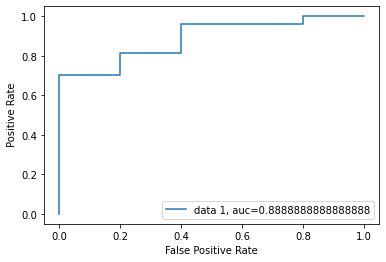

In [39]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, threshold = roc_curve(Y_test,  y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()